In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras

train = pd.read_csv('jester-v1-train.csv', delimiter = ';',header = None)
labels = pd.read_csv('jester-v1-labels.csv',delimiter = ';', header = None)
label_array = train.iloc[:,1].values
label_names = np.ndarray.tolist(labels.iloc[:,0].values)

/home/micahel/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# A function to convert the string labels to integer values

def toIntArr(labels_array):
    result = np.zeros(len(labels_array))
    for i in range(len(labels)):
        result[i] = label_names.index(labels_array[i])
    return result

label_array = toIntArr(label_array) 
    

In [3]:
# Convert labels to correct format for neural network

train_target = keras.utils.to_categorical(label_array,27)


In [4]:
# Next we read in the 20th image from every gesture video
import cv2
import os

train_images = np.zeros((118562,100,176))

def image(folder,file):
    # First put the correct number of zeros in the image string
    fileStr = str(file)
    if len(fileStr) == 1:
        fileStr = '0000' + fileStr + '.jpg'
    else:
        fileStr = '000' + fileStr + '.jpg'
        
    location = '20bn-jester-v1//' + str(folder) + '//' + fileStr
    im = cv2.imread(location)
    return im

def grayScale(im):
    return np.dot(im,np.asarray([0.2,0.4,0.4]))

def imProcess(im):
    gray = grayScale(im)
    return cv2.resize(gray,(176,100))

def readAndProcess(gesture_No,image_No):
    return imProcess(image(gesture_No,image_No))

# This function reads in the middle frame of a gesture

def readMiddleImage(gesture_no):
    frames = len(os.listdir('20bn-jester-v1/'+str(gesture_no)))
    return readAndProcess(gesture_no,int(frames/2))



for i in range(118562):
    train_images[i] = readMiddleImage(train.iloc[i,0])

Shaking Hand


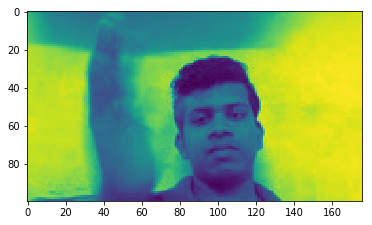

In [5]:
n =8025
train_images = train_images/255
print(train.iloc[n,1])
plt.imshow(train_images[n])

In [23]:
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten
from keras.models import Sequential

model1 = Sequential()
model1.add(Conv2D(32,(3,3), padding='same', activation='relu', input_shape = train_images.shape[1:] + (1,)))
model1.add(Conv2D(32,(3,3),padding = 'same',activation = 'relu'))
model1.add(MaxPooling2D(pool_size = (2,2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128,activation = 'relu'))
model1.add(Dense(27,activation = 'softmax'))
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [24]:
train_images = train_images.reshape((118562,100,176,1))

In [25]:
model1.fit(x = train_images, y = train_target,epochs = 1)

Epoch 1/1
118562/118562 [==============================] - 4075s 34ms/step - loss: 0.0046 - acc: 0.9995


Swiping Left


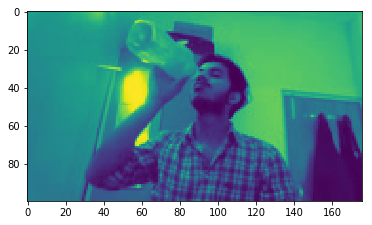

In [48]:
def vec2Str(vec):
    return labels.iloc[0,vec.tolist().index(max(vec.tolist()))]

print(vec2Str(model1.predict_classes(train_images[2701].reshape((1,100,176,1)))))
plt.imshow(train_images[2701].reshape((100,176)))